In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from skimage.feature import hog
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

In [0]:
dataset = keras.datasets.mnist

In [0]:
(X_trainfull, Y_trainfull), (X_testfull, Y_testfull) = dataset.load_data()

In [4]:
print(X_trainfull.shape[0],'X train samples')
print(X_testfull.shape[0],'X test samples')
print(Y_trainfull.shape[0], 'Y train samples')
print(Y_testfull.shape[0],'Y test samples')

60000 X train samples
10000 X test samples
60000 Y train samples
10000 Y test samples


In [5]:
pd.Series(Y_trainfull).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [6]:
pd.Series(Y_testfull).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [0]:
X_train = X_trainfull[:6000]
Y_train = Y_trainfull[:6000]
X_test = X_testfull[:1000]
Y_test = Y_testfull[:1000]

In [0]:
# x_train
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)

# x_test
X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

0.884


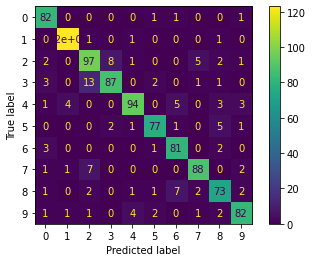

In [9]:
#Training model with HOG
model = LogisticRegression(random_state= 0, solver = 'newton-cg')
model.fit(X_train_feature, Y_train)
Y_pre = model.predict(X_test_feature)
print(accuracy_score(Y_test, Y_pre))
plot_confusion_matrix(model, X_test_feature, Y_test)
plt.show()    

In [10]:
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        85
           1       0.95      0.98      0.96       126
           2       0.80      0.84      0.82       116
           3       0.90      0.81      0.85       107
           4       0.92      0.85      0.89       110
           5       0.92      0.89      0.90        87
           6       0.85      0.93      0.89        87
           7       0.91      0.89      0.90        99
           8       0.82      0.82      0.82        89
           9       0.89      0.87      0.88        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



0.876


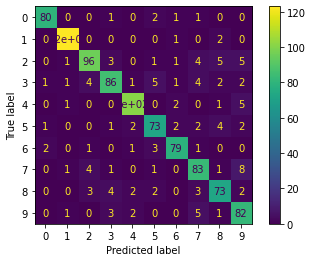

In [11]:
# Reducing dimensions
nsample, nx, ny = X_test.shape
X_test = X_test.reshape(nsample,nx*ny)
nsample, nx, ny = X_train.shape
X_train = X_train.reshape(nsample,nx*ny)

# SC = StandardScaler()
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

# Training model
model = LogisticRegression(random_state= 0, solver = 'newton-cg')
model.fit(X_train, Y_train)
Y_pre = model.predict(X_test)
print(accuracy_score(Y_test, Y_pre))
plot_confusion_matrix(model, X_test, Y_test)
plt.show()    

In [12]:
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        85
           1       0.96      0.98      0.97       126
           2       0.89      0.83      0.86       116
           3       0.87      0.80      0.83       107
           4       0.93      0.92      0.92       110
           5       0.84      0.84      0.84        87
           6       0.91      0.91      0.91        87
           7       0.81      0.84      0.82        99
           8       0.82      0.82      0.82        89
           9       0.77      0.87      0.82        94

    accuracy                           0.88      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000

